# Семинар 10 ДЗ

## Задача $1$

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.

Даны значения роста в трех группах случайно выбранных спортсменов:

Футболисты: $173, 175, 180, 178, 177, 185, 183, 182$.

Хоккеисты: $177, 179, 180, 188, 177, 172, 171, 184, 180$.

Штангисты: $172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170$.

Для применения дисперсионного анализа проверим условия применимости:

1. Значения групп должны следовать нормальному распределению
2. Однородность дисперсий
3. Независимость измерений

Проведем тест на нормальность

In [55]:
import numpy as np
from scipy import stats

In [56]:
x = np.array([173, 175, 180, 178, 177, 185, 183, 182])
y = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
z = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

In [57]:
print(stats.shapiro(x))
print(stats.shapiro(y))
print(stats.shapiro(z))

ShapiroResult(statistic=0.9775082468986511, pvalue=0.9495404362678528)
ShapiroResult(statistic=0.9579196572303772, pvalue=0.7763139009475708)
ShapiroResult(statistic=0.9386808276176453, pvalue=0.5051165223121643)


Тест Шапиро - Уилка показывает что _pvalue_ $> \alpha = 0.05$, следовательно распределение - нормальное

Также построим $QQ$ - графики

In [58]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

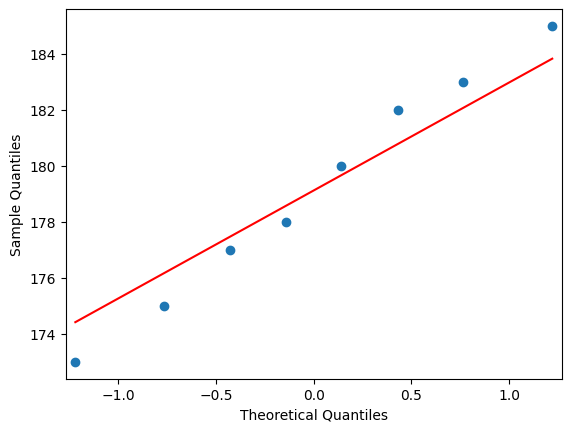

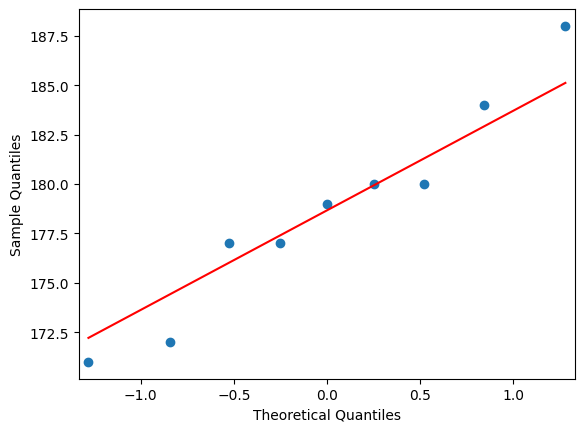

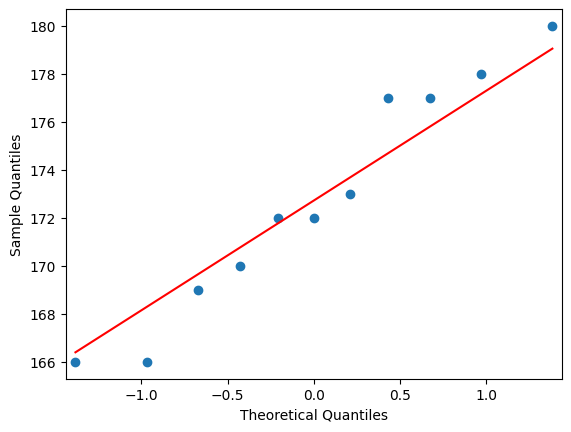

In [59]:
fig = sm.qqplot(x, line='s')
fig = sm.qqplot(y, line='s')
fig = sm.qqplot(z, line='s')

plt.show()

$QQ$ - графики показывают, что значения близки к нормальному распределению

2. Проверим на однородность дисперсий с помощью Барлетт теста

In [60]:
stats.bartlett(x, y, z)

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

_pvalue_ $ > \alpha = 0.05$, следовательно условие однородности дисперсий выполняется

3. Независимость измерений

Так как это разные спортивные команды, то значения роста независимы

Условия применения дисперсионного анализа соблюдены, можем применить модель

In [61]:
stats.f_oneway(x, y, z)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698693)

Так как _pvalue_ $< \alpha = 0.05$, следовательно статистически значимые различия между ростом групп спортсменов есть.

Чтобы подтвердить или опровергнуть наши выводы, используем post hoc test’ом Тьюки.

In [62]:
print(stats.tukey_hsd(x, y, z))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.458     0.979    -5.357     6.273
 (0 - 2)      6.398     0.022     0.837    11.958
 (1 - 0)     -0.458     0.979    -6.273     5.357
 (1 - 2)      5.939     0.028     0.561    11.318
 (2 - 0)     -6.398     0.022   -11.958    -0.837
 (2 - 1)     -5.939     0.028   -11.318    -0.561



Из результатов теста мы можем сделать вывод, что между группами $0$ (Футболисты) и $1$ (Хоккеисты) статистически значимых различий нет, но с группой $3$ (Штангисты) группы $1$ и $2$ статистически значимые различия присутствуют.

Для проверки проведем T-тесты:

In [63]:
stats.ttest_ind(x, y)

Ttest_indResult(statistic=0.19614731169591437, pvalue=0.8471274829862304)

In [64]:
stats.ttest_ind(x, z)

Ttest_indResult(statistic=3.03855188243496, pvalue=0.007418502503470327)

In [65]:
stats.ttest_ind(z, y)

Ttest_indResult(statistic=-2.6191601707417584, pvalue=0.017384077963160167)

Значения _pvalue_ для тестов подтверждают сделанный ранее вывод

Для полноты картины проведем дисперсионный анализ вручную:

1. Формулируем нулевую и альтернативную гипотезы.

$H_0: μ_x = μ_y = μ_z$

Альтернативная гипотеза состоит из нескольких частей. Сравнивать будем попарно средние арифметические.

$H_1.1: μ_x=μ_y$<br>
$H_1.2: μ_x=μ_z$<br>
$H_1.3: μ_y=μ_z$<br>

Дисперсионный анализ не даст ответа на вопрос, между какими именно двумя средними арифметическими найдены статистически значимые различия.

Он лишь ответит на вопрос, влияет ли профессия на заработную плату или не влияет.

Дисперсионный анализ покажет влияние фактора в случае, если хотя бы между одной парой средних арифметических будут найдены статистически значимые различия и покажет, что не влияет, если будут отвергнуты все три маленькие альтернативные гипотезы $H_{1.1},H_{1.2},H_{1.3}$.



2. Теперь заранее устанавливаем уровень статистической значимости $α$. Мы выберем, как обычно, $0.05$



3. На этом этапе тестирования гипотезы идет выбор критерия. В дисперсионном анализе используется критерий Фишера.

Критерий Фишера находится по формуле:

$F_н=\dfrac{σ_ф^2}{σ_{ост}^2}$,

где $σ_ф^2$ – факторная дисперсия,<br>
а $σ_{ост}^2$ – остаточная дисперсия.

Посчитаем при помощи Python

In [66]:
# среднее значение роста для каждой группы
x_mean = x.mean()
y_mean = y.mean()
z_mean = z.mean()
x_mean, y_mean, z_mean

(179.125, 178.66666666666666, 172.72727272727272)

In [67]:
# общее среднее значение роста
total = np.concatenate([x, y, z])
total_mean = total.mean()
total_mean

176.46428571428572

In [68]:
# сумма квадратов отклонений от общего среднего

np.sum((total - total_mean)**2)

830.9642857142854

In [69]:
# Сумма квадратов отклонений средних групповых значений от общего среднего

S_f = np.sum(len(x) * (x_mean - total_mean) ** 2 +
             len(y) * (y_mean - total_mean) ** 2 +
             len(z) * (z_mean - total_mean) ** 2)
S_f

253.9074675324678

In [70]:
# Остаточная сумма квадратов отклонений

S_ost = (np.sum((x - x_mean) ** 2) + 
         np.sum((y - y_mean) ** 2) +
         np.sum((z - z_mean) ** 2))
S_ost

577.0568181818182

In [71]:
# степени свободы

k = 3 # количество групп
n = len(total)
k, n

(3, 28)

In [72]:
# факторная дисперсия и внутригрупповая дисперсия

D_f = S_f /  (k - 1)
D_ost = S_ost / (n - k)
D_f, D_ost

(126.9537337662339, 23.08227272727273)

In [73]:
# значение F-критерия
F_n = D_f / D_ost
F_n

5.500053450812598

In [74]:
from scipy.stats import f

In [75]:
#критическое значение F при выбранном уровне значимости ( alpha = 0.05)
alpha = 0.05
critical_value = f.ppf(1 - alpha, k - 1, n - k)
critical_value

3.3851899614491683

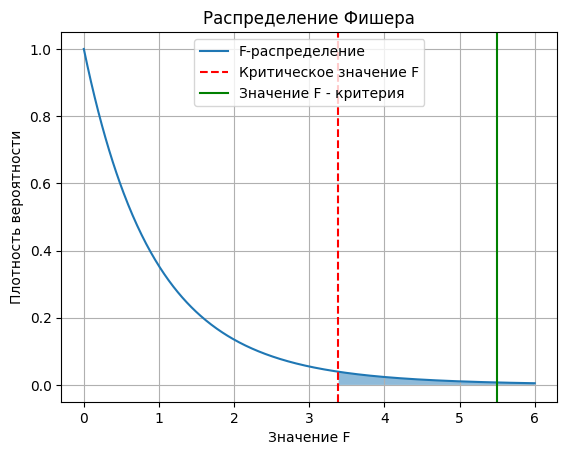

In [79]:
# значения для оси x
x = np.linspace(0, 6, 500)

# плотность вероятности распределения Фишера
pdf = f.pdf(x, k - 1, n - k)

plt.plot(x, pdf, label='F-распределение')
plt.axvline(critical_value, color='r', linestyle='--', label='Критическое значение F')
plt.axvline(F, color='g', linestyle='-', label='Значение F - критерия')
plt.fill_between(x, pdf, where=(x >= critical_value), alpha=0.5)
plt.xlabel('Значение F')
plt.ylabel('Плотность вероятности')
plt.title('Распределение Фишера')
plt.legend()
plt.grid(True)

plt.show()

Значения полученные таким способом равны, тем что получены с использованием встроенной функции, выводы те же. 

Значение F-критерия выходит за область принятия нулевой гипотезы, значит принимается альтернативная гипотеза, о точ что статистически значимые различия есть.